In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
data=pd.read_csv('C:/Users/Administrator/Downloads/marks.txt', header = None)

In [2]:
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.shape

(100, 3)

In [4]:
X=data.iloc[:,:2]
Y=data.iloc[:,2:3]


In [5]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=0)

In [6]:
reg=LogisticRegression()
reg=reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
print(y_pred)

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1]


In [7]:
reg.coef_

array([[0.03032132, 0.03124498]])

In [8]:
reg.intercept_

array([-3.4294559])

In [9]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("confusion_matrix",cm,sep='\n')

confusion_matrix
[[ 7  1]
 [ 0 12]]


In [10]:
accuracy_score(y_test,y_pred)

0.95

In [11]:
probs= reg.predict_proba(x_test)
probs

array([[0.40071976, 0.59928024],
       [0.42315594, 0.57684406],
       [0.51616621, 0.48383379],
       [0.51429434, 0.48570566],
       [0.13486256, 0.86513744],
       [0.18539035, 0.81460965],
       [0.42245172, 0.57754828],
       [0.33457637, 0.66542363],
       [0.58626863, 0.41373137],
       [0.35121868, 0.64878132],
       [0.62141171, 0.37858829],
       [0.65379385, 0.34620615],
       [0.56664833, 0.43335167],
       [0.15097318, 0.84902682],
       [0.4255642 , 0.5744358 ],
       [0.33036689, 0.66963311],
       [0.59162222, 0.40837778],
       [0.25192999, 0.74807001],
       [0.42114915, 0.57885085],
       [0.16667003, 0.83332997]])

In [12]:
from sklearn import metrics
prob_positive=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the cureve:",roc_auc)

Area under the cureve: 0.9895833333333334


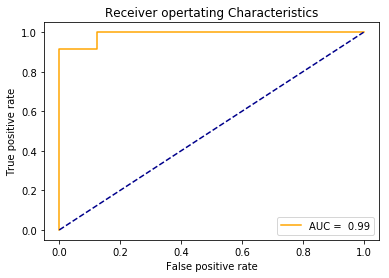

In [13]:
import matplotlib.pyplot as plt
plt.title('Receiver opertating Characteristics')
plt.plot(fpr,tpr,'orange',label='AUC = % .2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()